In [8]:
el<-matrix(nc=3, byrow=TRUE,
           c(1,2,0, 1,3,2, 1,4,1, 2,3,0, 2,5,5, 2,6,2, 3,2,1,
            3,4,1, 3,7,1, 4,3,0, 4,7,2, 5,6,2, 5,8,8, 6,3,2,
            6,7,1, 6,9,1, 6,10,3, 8,6,1, 8,9,1, 9,10,4))
el

1,2,0
1,3,2
1,4,1
2,3,0
2,5,5
2,6,2
3,2,1
3,4,1
3,7,1
4,3,0
4,7,2


In [10]:
# 1~2번째 열을 행으로 Transpose해라
t(el[,1:2])

1,1,1,2,2,2,3,3,3,4,4,5,5,6,6,6,6,8,8,9
2,3,4,3,5,6,2,4,7,3,7,6,8,3,7,9,10,6,9,10


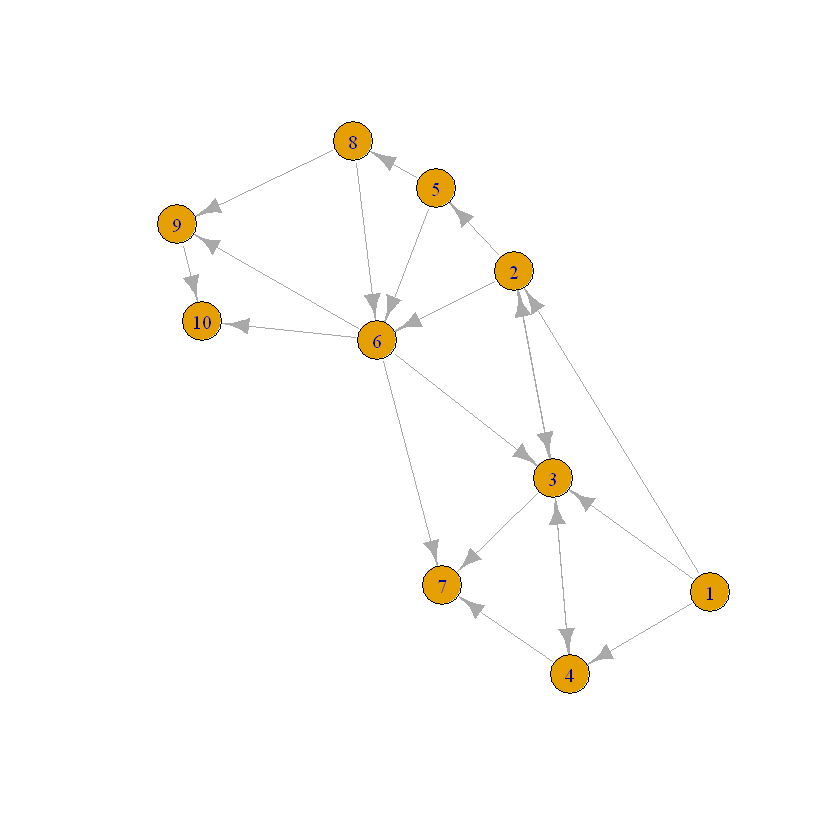

In [13]:
# edge의 가중치를 el행렬의 3번째 열의 값으로 설정
g2<-add_edges(make_empty_graph(10), t(el[,1:2]), weight=el[,3])
plot(g2)

In [16]:
#노드간 거리 계산 - distance함수
# mode='out' => 밖으로 나가는 방향의 거리를 계산('in'도 있음)
distances(g2, mode='out')

0,0,0,1,5,2,1,13,3,5
Inf,0,0,1,5,2,1,13,3,5
Inf,1,0,1,6,3,1,14,4,6
Inf,1,0,0,6,3,1,14,4,6
Inf,5,4,5,0,2,3,8,3,5
Inf,3,2,3,8,0,1,16,1,3
Inf,Inf,Inf,Inf,Inf,Inf,0,Inf,Inf,Inf
Inf,4,3,4,9,1,2,0,1,4
Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,0,4
Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,0


In [19]:
# 근접행렬(adjacency matrix) 생성
L<-matrix(c(0,0,0,1,0,0,0,0,0,
           0,0,0,1,0,0,0,0,0,
           0,0,0,1,0,0,0,0,0,
           1,1,1,0,1,0,0,0,0,
           0,0,0,1,0,1,0,0,0,
           0,0,0,0,1,0,1,0,0,
           0,0,0,0,0,1,0,1,0,
           0,0,0,0,0,0,1,0,1,
           0,0,0,0,0,0,0,1,0),
         byrow=T, nrow=9)
L

0,0,0,1,0,0,0,0,0
0,0,0,1,0,0,0,0,0
0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0
0,0,0,1,0,1,0,0,0
0,0,0,0,1,0,1,0,0
0,0,0,0,0,1,0,1,0
0,0,0,0,0,0,1,0,1
0,0,0,0,0,0,0,1,0


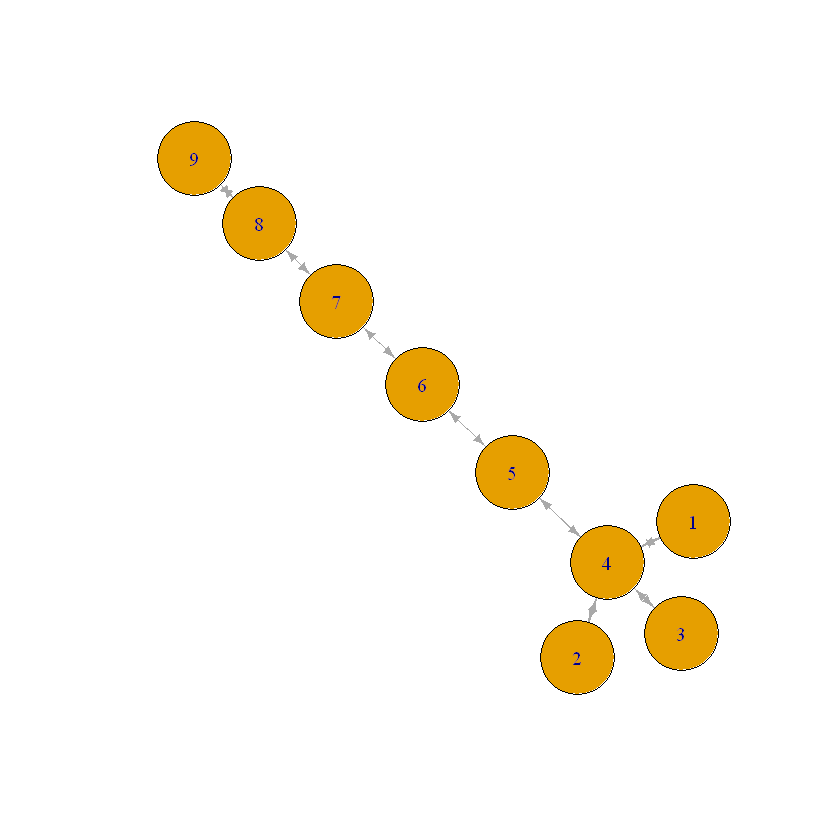

In [24]:
#근접행렬로부터 그래프(네트워크) 생성
g<-graph_from_adjacency_matrix(L, mode='directed')
plot(g, vertex.size=30, edge.arrow.size=0.5)

In [27]:
centr_degree(g, mode='all')

$res
[1] 2 2 2 8 4 4 4 4 2

$centralization
[1] 0.3125

$theoretical_max
[1] 128

In [30]:
#중개중심성 계산 -estimate_betweenness함수
estimate_betweenness(g, vids=V(g), cutoff=10)

[1]  0  0  0 36 32 30 24 14  0

In [31]:
#중개중심성 계산하는 다른함수 betweenness함수
betweenness(g)

[1]  0  0  0 36 32 30 24 14  0

In [34]:
#근접 중심성 계산 - closeness함수 사용
closeness(g, vids=V(g), mode='all')

[1] 0.04000000 0.04000000 0.04000000 0.05555556 0.05882353 0.05555556 0.04761905
[8] 0.03846154 0.03030303

In [36]:
e_g<-eigen_centrality(g)
e_g$vector

[1] 0.4723926 0.4723926 0.4723926 1.0000000 0.6997053 0.4811943 0.3189268
[8] 0.1939366 0.0916142

In [37]:
which.max(e_g$vector)

[1] 4